QUANTUM CLASE 08/10/2024: HACER KERNEL DE SUPORT VECTOR MACHINES (SVM) A MANO.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()

# Convertir a DataFrame para mayor flexibilidad
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df = df[['sepal length (cm)', 'sepal width (cm)', 'target']]

# Eliminar una de las clases (por ejemplo, la clase con target == 2)
df = df[df['target'] != 2]

# Separar características (X) y etiquetas (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir en conjuntos de entrenamiento y prueba (80% para entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Imprimir la forma de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')
print(f'Tamaño de las etiquetas de entrenamiento: {y_train.shape}')
print(f'Tamaño de las etiquetas de prueba: {y_test.shape}')

Tamaño del conjunto de entrenamiento: (80, 2)
Tamaño del conjunto de prueba: (20, 2)
Tamaño de las etiquetas de entrenamiento: (80,)
Tamaño de las etiquetas de prueba: (20,)


In [4]:
import numpy as np

def kernel_lineal(X):
    # Convertir el DataFrame a un array de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # Obtener el número de muestras
    n = X.shape[0]
    
    # Inicializar la matriz del kernel con ceros
    K = np.zeros((n, n))
    
    # Calcular el kernel lineal
    for i in range(n):
        for j in range(n):
            K[i, j] = np.dot(X[i, :], X[j, :])  # Producto escalar entre las filas i y j
    
    return K

# Suponiendo que X_train es un DataFrame de pandas
kernel_l = np.array(kernel_lineal(X_train))
print(kernel_l)

[[ 0.46834132  0.16295388 -0.66308141 ... -0.98727754  0.77372875
   0.34190241]
 [ 0.16295388  0.06418313 -0.25399882 ... -0.21854981  0.26172463
   0.23685342]
 [-0.66308141 -0.25399882  1.0112457  ...  1.00902525 -1.072164
  -0.85084477]
 ...
 [-0.98727754 -0.21854981  1.00902525 ...  4.16737952 -1.75600527
   1.24740881]
 [ 0.77372875  0.26172463 -1.072164   ... -1.75600527  1.28573287
   0.4469514 ]
 [ 0.34190241  0.23685342 -0.85084477 ...  1.24740881  0.4469514
   2.10640488]]


LO siguiente se hizo en la clase del 15/10/2024:

KERNEL POLINOMICO:

In [5]:
import numpy as np

def kernel_polinomico(X, c=1, d=2):
    """
    Kernel polinómico de segundo grado: K(x_i, x_j) = (x_i · x_j + c)^d
    :param X: Matriz de entrada de datos (puede ser un DataFrame o un array de NumPy).
    :param c: Constante de desplazamiento (por defecto es 1).
    :param d: Grado del polinomio (por defecto es 2).
    :return: Matriz del kernel polinómico.
    """
    # Convertir el DataFrame a un array de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # Obtener el número de muestras
    n = X.shape[0]
    
    # Inicializar la matriz del kernel con ceros
    K = np.zeros((n, n))
    
    # Calcular el kernel polinómico
    for i in range(n):
        for j in range(n):
            K[i, j] = (np.dot(X[i, :], X[j, :]) + c) ** d  # Kernel polinómico de segundo grado
    
    return K

# Suponiendo que X_train es un DataFrame de pandas
kernel_p = np.array(kernel_polinomico(X_train))
print(kernel_p)

[[2.15602622e+00 1.35246174e+00 1.13514136e-01 ... 1.61861033e-04
  3.14611368e+00 1.80070208e+00]
 [1.35246174e+00 1.13248574e+00 5.56517756e-01 ... 6.10664400e-01
  1.59194905e+00 1.52980638e+00]
 [1.13514136e-01 5.56517756e-01 4.04510926e+00 ... 4.03618247e+00
  5.20764254e-03 2.22472830e-02]
 ...
 [1.61861033e-04 6.10664400e-01 4.03618247e+00 ... 2.67018111e+01
  5.71543964e-01 5.05084634e+00]
 [3.14611368e+00 1.59194905e+00 5.20764254e-03 ... 5.71543964e-01
  5.22457475e+00 2.09366836e+00]
 [1.80070208e+00 1.52980638e+00 2.22472830e-02 ... 5.05084634e+00
  2.09366836e+00 9.64975126e+00]]


APLICACIÓN:

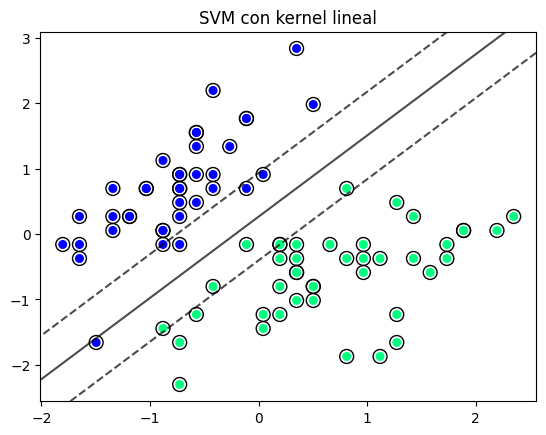

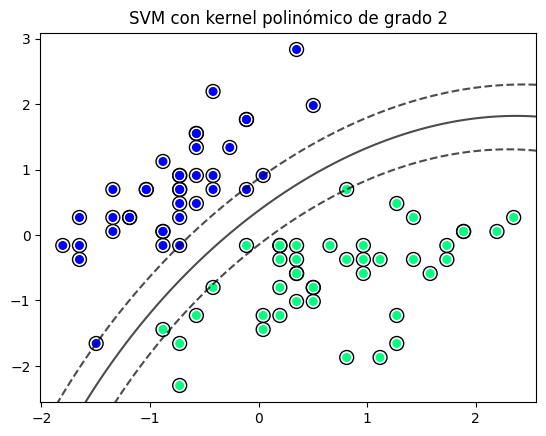

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

def kernel_lineal(X, Y):
    """
    Kernel lineal: K(x_i, x_j) = x_i · x_j
    :param X: Matriz de entrada de datos X (puede ser un DataFrame o un array de NumPy).
    :param Y: Matriz de entrada de datos Y (puede ser un DataFrame o un array de NumPy).
    :return: Matriz del kernel lineal.
    """
    # Convertir DataFrames a arrays de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    if isinstance(Y, pd.DataFrame):
        Y = Y.to_numpy()

    # Calcular el kernel lineal de manera vectorizada
    return np.dot(X, Y.T)

def kernel_polinomico(X, Y, c=1, d=2):
    """
    Kernel polinómico de segundo grado: K(x_i, x_j) = (x_i · x_j + c)^d
    :param X: Matriz de entrada de datos X (puede ser un DataFrame o un array de NumPy).
    :param Y: Matriz de entrada de datos Y (puede ser un DataFrame o un array de NumPy).
    :param c: Constante de desplazamiento (por defecto es 1).
    :param d: Grado del polinomio (por defecto es 2).
    :return: Matriz del kernel polinómico.
    """
    # Convertir DataFrames a arrays de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    if isinstance(Y, pd.DataFrame):
        Y = Y.to_numpy()

    # Calcular el kernel polinómico de manera vectorizada
    return (np.dot(X, Y.T) + c) ** d


# Precomputar los kernels
kernel_l = kernel_lineal(X_train, X_train)
kernel_p = kernel_polinomico(X_train, X_train)

# Entrenar SVM con kernel lineal precomputado
svm_lineal = svm.SVC(kernel='precomputed')
svm_lineal.fit(kernel_l, y_train[:100])

# Entrenar SVM con kernel polinómico precomputado
svm_polinomico = svm.SVC(kernel='precomputed')
svm_polinomico.fit(kernel_p, y_train[:100])

# Función para graficar la clasificación
def graficar_clasificacion(modelo, X, y, titulo, kernel_fn):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=30)
    
    # Crear una malla para el contorno
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    # Precomputar el kernel para la malla
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    kernel_mesh = kernel_fn(X_mesh, X)
    
    Z = modelo.decision_function(kernel_mesh)
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los márgenes
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])

    # Dibujar los vectores soporte
    ax.scatter(X[:, 0], X[:, 1], s=100, linewidth=1,
               facecolors='none', edgecolors='k')

    plt.title(titulo)
    plt.show()

# Graficar la clasificación para el kernel lineal
graficar_clasificacion(svm_lineal, X_train, y_train[:100], "SVM con kernel lineal", kernel_lineal)

# Graficar la clasificación para el kernel polinómico de segundo grado
graficar_clasificacion(svm_polinomico, X_train, y_train[:100], "SVM con kernel polinómico de grado 2", kernel_polinomico)

In [7]:
def calculator_kernel(X, Y):
    """
    Calcula el kernel polinómico entre dos matrices X y Y usando bucles anidados.
    Puede trabajar con DataFrames de pandas o numpy arrays.
    """
    # Asegurarse de que X y Y sean numpy arrays
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(Y, pd.DataFrame):
        Y = Y.values
    
    # Obtener las dimensiones de las matrices
    n_samples_X, n_features = X.shape
    n_samples_Y = Y.shape[0]
    
    # Crear una matriz de ceros para almacenar el resultado
    kernel_matrix = np.zeros((n_samples_X, n_samples_Y))
    
   # Bucle anidado para calcular el kernel
    for i in range(n_samples_X):
        for j in range(n_samples_Y):
            dot_product = 0
            for k in range(n_features):
                # Transformaciones complejas
                term1 = np.sin(X[i, k]**2) * np.cos(Y[j, k]**2)                         # Seno y coseno de cuadrados
                term2 = np.log1p(np.abs(X[i, k] - Y[j, k]) + 1)                       # Logaritmo de la diferencia
                term3 = np.exp(-0.5 * (X[i, k] - Y[j, k])**2)                        # Exponencial gaussiana
                term4 = np.tanh(X[i, k] * Y[j, k] + 1)                                # Tangente hiperbólica desplazada
                term5 = np.power(X[i, k] * Y[j, k], 3)                                # Producto elevado a la potencia cúbica
                term6 = np.arctan(X[i, k] * Y[j, k])                                  # Arcotangente del producto
                term7 = np.abs(np.sin(X[i, k]) - np.cos(Y[j, k]))                    # Diferencia de seno y coseno
                term8 = np.sqrt(np.maximum(0, np.abs(X[i, k] * Y[j, k])))            # Raíz cuadrada del producto (no negativa)
  
                # Sumar los términos
                dot_product += term1 + term2 + term3 + term4 + term5 + term6 + term7 + term8 
                
            # Normalizar y asegurar que el resultado esté en un rango válido
            kernel_matrix[i, j] = np.log1p(np.maximum(0, np.abs(dot_product) + 1))  # Aplicar log1p al resultado final
    
    return kernel_matrix

# Precomputar los kernels
kernel_3 = calculator_kernel(X_train, X_train)

# Entrenar SVM con kernel precomputado
svm_lineal1 = svm.SVC(kernel='precomputed')
svm_lineal1.fit(kernel_3, y_train[:100])

SVC(kernel='precomputed')

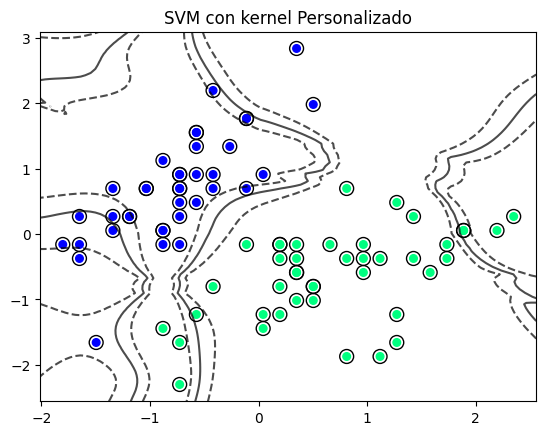

In [8]:
# Graficar la clasificación para el kernel personalizado
graficar_clasificacion(svm_lineal1, X_train, y_train[:100], "SVM con kernel Personalizado", calculator_kernel)

In [9]:
import numpy as np
import pandas as pd
from sklearn import svm

def Transform(X, Y):
    """
    Aplica una transformación no lineal a las matrices X e Y para enriquecer el espacio de características.
    :param X: Matriz de entrada de datos X (puede ser un DataFrame o un array de NumPy).
    :param Y: Matriz de entrada de datos Y (puede ser un DataFrame o un array de NumPy).
    :return: Lista de matrices transformadas.
    """
    # Asegurarse de que X y Y sean arrays de NumPy si no lo son
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    if isinstance(Y, pd.DataFrame):
        Y = Y.to_numpy()

    # Crear transformaciones complejas sobre X y Y
    X_squared = X**2
    Y_squared = Y**2
    X_cubed = X**3
    Y_cubed = Y**3
    sin_X = np.sin(X)
    cos_Y = np.cos(Y)
    exp_X = np.exp(X)
    exp_Y = np.exp(Y)

    # Puedes agregar combinaciones como multiplicaciones entre matrices
    XY_interaction = X * Y
    X_sin_Y = np.sin(X) * np.cos(Y)
    
    # Devolver una lista de todas las transformaciones aplicadas
    return [X, X_squared, Y, Y_squared, X_cubed, Y_cubed, sin_X, cos_Y, exp_X, exp_Y, XY_interaction, X_sin_Y]

def kernel_lineal(X, Y):
    """
    Kernel lineal: K(x_i, x_j) = x_i · x_j en el espacio de características transformado.
    """
    # Aplicar la transformación no lineal
    transformed_data = Transform(X, Y)  # Recibe la lista completa de transformaciones

    # Calcular el kernel lineal usando solo la primera transformación por simplicidad
    return np.dot(transformed_data[0], transformed_data[2].T)

# Datos de ejemplo
X_train = np.random.randn(100, 2)  # Generar 100 muestras aleatorias con 2 características
y_train = np.random.choice([0, 1], 100)  # Etiquetas binarias

# Aplicar la transformación
transformed_data = Transform(X_train, X_train)  # Captura todas las transformaciones en una sola variable

# Calcular el kernel con las matrices transformadas
kernel_transformed = kernel_lineal(X_train, X_train)

# Entrenar el SVM con kernel precomputado
svm_lineal = svm.SVC(kernel='precomputed')
svm_lineal.fit(kernel_transformed, y_train)

print("SVM entrenado con kernel transformado.")


SVM entrenado con kernel transformado.


### KERNEL CUÁNTICO

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

def transformacion(x):
    # Determinar el número de qubits necesario a partir de la longitud de x
    num_qubits = len(x)
    
    # Crear un circuito cuántico con num_qubits qubits
    qc = QuantumCircuit(num_qubits)
    
    # Aplicar Hadamard y rotaciones Rz a cada qubit
    for i in range(num_qubits):
        if i % 2 == 0: 
            qc.h(i)  # Aplicar Hadamard al qubit i
            qc.rz(x[i], i)  # Aplicar una rotación Rz al qubit i con el ángulo x[i]
        else:
            qc.h(i)  # Aplicar Hadamard al qubit i
            qc.rx(x[i], i)  # Aplicar una rotación Rx al qubit i con el ángulo x[i]
    
    # Aplicar puertas CNOT entre pares de qubits adyacentes
    for i in range(num_qubits - 1):
        qc.cx(i, i + 1)  # Aplicar una puerta CNOT entre el qubit i y el qubit i+1

    # Obtener el statevector usando el método correcto
    statevector = Statevector.from_instruction(qc)
    
    return np.array(statevector)

def kernel_personalizado(X, Y):
    # Inicializar la matriz del kernel
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))

    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            # Calcular el producto escalar entre las transformaciones de x e y
            kernel_matrix[i, j] = np.dot(transformacion(X[i]), transformacion(Y[j])).real

    return kernel_matrix

# Precomputar los kernels
kernel_pers = kernel_personalizado(X_train, X_train)

# Entrenar SVM con kernel personalizado precomputado
svm_personalizado = svm.SVC(kernel='precomputed', C=100)
svm_personalizado.fit(kernel_pers, y_train[:100])

def graficar_clasificacion(modelo, X, y, X_test, y_test, titulo, kernel_fn):
    plt.figure(figsize=(12, 8))

    # Graficar puntos de entrenamiento
    scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Train data', alpha=0.8)

    # Graficar puntos de prueba con marcadores distintos (x) y colores diferentes
    scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=100, marker='x', label='Test data')

    # Especificar límites de los ejes X e Y
    x_min, x_max = -5, 10
    y_min, y_max = -5, 10

    # Crear una malla para el contorno de decisión
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))

    # Precomputar el kernel para la malla
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    kernel_mesh = kernel_fn(X_mesh, X)

    Z = modelo.decision_function(kernel_mesh)
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los márgenes
    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(Z.min(), Z.max(), 20), cmap='coolwarm')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

    # Mejorar la visualización
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.colorbar(scatter_train, label='Classes')
    plt.title(titulo, fontsize=16)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


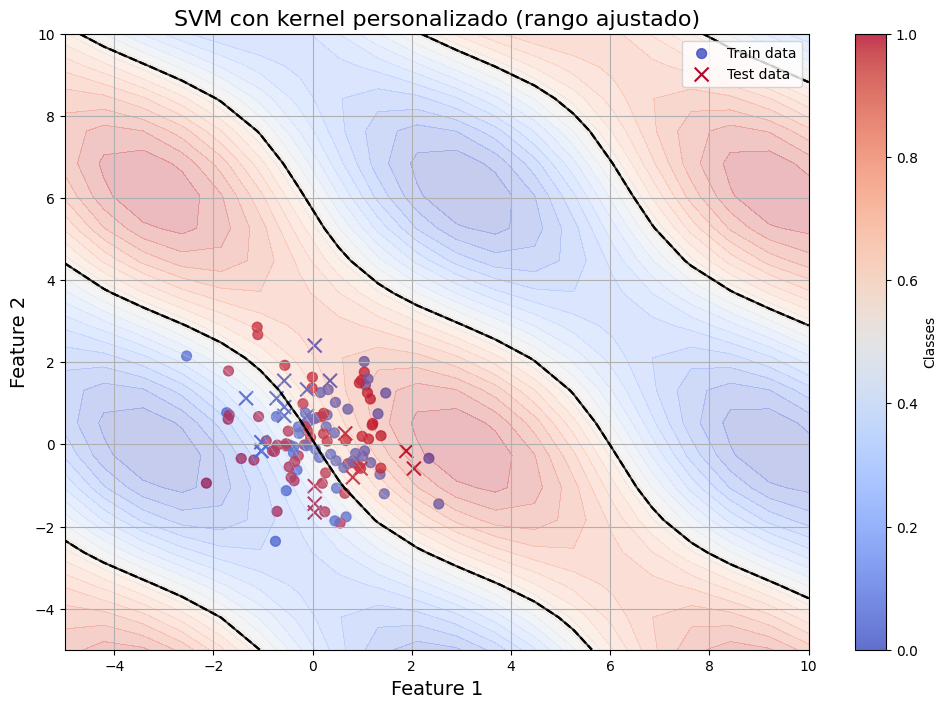

In [14]:
# Graficar la clasificación para el kernel personalizado con límites ajustados
graficar_clasificacion(svm_personalizado, X_train, y_train[:100], X_test, y_test[:100], "SVM con kernel personalizado (rango ajustado)", kernel_personalizado)